# 🧠 REDES NEURONALES
## 🧪 Facultad de Ciencias
## 🏫 Universidad Nacional Autónoma de México

<hr>

### 📄 Práctica No. 02

#### Realizado por:
#### Iván Alejadro Ramos Herrera
#### 💜 [@arhcoder](https://github.com/arhcoder)



# [01] 📚 Selección de Dataset

## MNIST
### Fuente: sklearn.datasets.load_digits
### Información del dataset:

> Load and return the digits dataset (classification). Each datapoint is a 8x8 image of a digit.

|                   |      |
|-------------------|------|
| Classes           | 10   |
| Samples per class | ~180 |
| Samples total     | 1797 |
| Dimensionality    | 64   |
| Features integers | 0-16 |

> We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

> For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.



In [4]:
# Se obtiene el dataset:
from sklearn.datasets import load_digits
digits = load_digits()

## 🔎 Exploración

In [6]:
# Explorando el dataset:
print("Data:\n", digits.data,)
print("\nTamaños:", digits.data.shape)
print("\nImágen:\n", digits.images[0])
print("\nTargets:", digits.target)

Data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Tamaños: (1797, 64)

Imágen:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Targets: [0 1 2 ... 8 9 8]


🔎 Según la documentación, el dataset incluye miles de imágenes de 8x8 que contienen el dibujo de cada uno de los dígitos escritos a mano del 0 al 10. Aproximadamente 180 ejemplos por cada dígito.

Las imágenes están representadas como matrices de 8x8 en $digits.images$, en donde esto retorna una lista con cada imágen.

En $digits.data$ se incluyen todas las imágenes como un vector de 64 features.

En $digits.target$ se incluyen las clasificaciones.

# [02] 📑 Separación en Train - Test
### Se hará una separación de los datos en un esquema 70% entrenamiento y 30% evaluación

## 📦 Separación

In [7]:
import random
from sklearn.preprocessing import LabelBinarizer

# Se establecen las variables:
X = digits.data
y = digits.target

# Se hace un shuffle al dataset para evitar sesgos:
data = list(zip(X, y))
random.shuffle(data)
X, y = zip(*data)

# Se separa en 70% - 30%:
train_size = int(0.7 * len(X))

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

# Convierte las etiquetas a One-Hot:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

print("X de Entrenamiento:", len(X_train))
print("X de Evaluación:", len(X_test))
print("\ny de Entrenamiento:", len(y_train))
print("y de Evaluación:", len(y_test))

X de Entrenamiento: 1257
X de Evaluación: 540

y de Entrenamiento: 1257
y de Evaluación: 540


# [03] 🧠 Red Neuronal FeedForward
### Para problemas de clasificación

## 🧮 Código

In [12]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# FEED FORWARD NEURAL NETWORK CLASS #
class NeuralNetwork:

  # FEED FORWARD NEURAL NETWORK CONSTRUCTOR:
  def __init__(self, inputs: int, classes: int, hidden_layers: list, output_function="softmax", cost_function="cross entropy"):

    '''
      FEEDFORWARD NEURAL NETWORK
      [FOR CLASSIFICATION]

        Attributes:
        - inputs [int]: Amount of entry neuron unities.
        - classes [int]: Amount of classificaction labels.
        - hidden_layers: [list[tuples]]: List of tuples with the next structure for each hiden layer:
          - hidden_layers:
          [
            (
              amount_neuron_unities [int],
              activation_function [string]
            )
          ]
          Example:
          hidden_layers:
          [
            (50, "sigmoid"),
            (30, "tanh")
          ]
        - output_function [string]: Activation function for the output layer. It could be:
          * "identity"
          * "step"
          * "sigmoid"
          * "softmax"
          * "relu"
          * "tanh"
          [default is "softmax"]

          - cost_function [string]: Cost function to fit the weights. It could be:
          * "cross entropy" (default)
    '''


    # ATTRIBUTES #
    # Basics:
    self.classes = classes
    self.inputs = inputs
    self.activation_functions = {
      "identity": lambda x: x,
      "step": lambda x: np.where(x >= 0, 1, 0),
      "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
      "softmax": lambda x: np.exp(x - np.max(x, axis=0)) / np.sum(np.exp(x - np.max(x, axis=0)), axis=0),
      "relu": lambda x: np.maximum(0, x),
      "tanh": lambda x: np.tanh(x)
    }
    self.activation_derivates = {
      "identity": lambda x: np.ones_like(x),
      "step": lambda x: np.zeros_like(x),
      "sigmoid": lambda x: x * (1 - x),
      "softmax": lambda x: np.exp(x - np.max(x, axis=1, keepdims=True)) / np.sum(np.exp(x - np.max(x, axis=1, keepdims=True)), axis=1, keepdims=True),
      "relu": lambda x: (x > 0).astype(float),
      "tanh": lambda x: 1 - x**2
    }
    self.output_function = self.activation_functions[output_function]
    self.output_function_derivate = self.activation_derivates[output_function]

    self.cost_functions = {
      "cross entropy": lambda y, y_predicted: -np.sum(y * np.log(y_predicted + 1e-10)),
      "mse": lambda y, y_predicted: np.mean((y - y_predicted) ** 2)
    }
    self.cost_functions_derivates = {
      "cross entropy": lambda y, y_predicted: y_predicted - y,
      "mse": lambda y, y_predicted: 2 * (y_predicted - y) / len(y)
    }
    self.cost_function_name = cost_function
    self.cost_function = self.cost_functions[cost_function]
    self.cost_function_derivate = self.cost_functions_derivates[cost_function]

    # Hidden Layers:
    self.hidden_layers = list()
    try:
      # Constructs the Hidden Layers:
      for layer_unities, activation in hidden_layers:
        self.hidden_layers.append({
          "unities": layer_unities,
          "activation": self.activation_functions[activation],
          "activation_derivate": self.activation_derivates[activation]
        })
    except ValueError as verror:
      error = str(f'''
      Invalid format for hidden_layers: Try like:
      [
            (
              amount_neuron_unities [int],
              activation_function [string]
            )
      ]

      Example:
      hidden_layers = [(50, "sigmoid"), (30, "tanh")]

      You put: {hidden_layers}
      ''')
      print(verror)
      raise ValueError(error)

      # To save cost in each epoch:
      self.costs = list()


    # Weights and Biases:
    # Xaver Initialization:
    self.W = []
    self.b = []

    # For input layer:
    self.W.append(np.random.randn(self.hidden_layers[0]["unities"], self.inputs) * np.sqrt(1 / self.inputs))
    self.b.append(np.zeros(self.hidden_layers[0]["unities"]))

    # For hidden layers:
    for layer in range(1, len(self.hidden_layers)):
      self.W.append(np.random.randn(self.hidden_layers[layer]["unities"], self.hidden_layers[layer - 1]["unities"]) * np.sqrt(1 / self.hidden_layers[layer - 1]["unities"]))
      self.b.append(np.zeros(self.hidden_layers[layer]["unities"]))

    # For Output Layer:
    self.W.append(np.random.randn(self.classes, self.hidden_layers[-1]["unities"]) * np.sqrt(1 / self.hidden_layers[-1]["unities"]))
    self.b.append(np.zeros(self.classes))



  # TRAINING FUNCTION:
  def train(self, X_train, y_train, optimizer="gradient", epochs=1000, learning_rate=0.01, batch_size=1):
    '''
      Inputs:
        - X_train: Training data matrix.
        - y_train: Training labels vector.
        - optimizer [string]: Optimizer to fit the weights. It could be:
          * "gradient" (defalut): Simple Gradient Descend.
          * "adagrad": Adaptative Gradient Descend.

        - epochs [int]: Amount of iterations in the traning.
          [default 1000]

        - learning_rate [flaot]: For optimizaters.
          [default 0.01]

        - batch_size [int]: Amount of data that will be used to fit the weights in each iteration.
          [default 1 (as Stochastic Gradient Descend)]
    '''
    # Checks the optimizers:
    if optimizer == "gradient":
      self.optimizer = self.update_gradient
    elif optimizer == "adagrad":
      self.optimizer = self.update_adagrad
    else:
      raise ValueError(f"Invalid optimizer: {optimizer}.\nValid options:\n*\"gradient\"\n*\"adagrad\"")


    # Epochs:
    self.costs = [0]
    X_train = np.array(X_train)
    print(f"Total Epochs {epochs}")
    for epoch in tqdm(range(epochs), desc="Training Progress"):

      # Batches:
      batch_costs = list()
      for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Forward:
        activations, outputs = self.forward(X_batch)

        # Backward:
        self.backward(X_batch, y_batch, activations, outputs)

        # Update weights:
        self.optimizer(learning_rate, activations)

      # Cost on the epoch:
      _, predictions = self.forward(X_train)
      cost = self.cost_function(y_train, np.argmax(predictions[-1]))
      self.costs.append(cost)
    print("\nTrained! 😎")




  # FORWARD STEP FOR TRAINING:
  def forward(self, X: np.ndarray):
    '''
      Pass the X batch through the layers.

      Inputs:
        - X [numpy.ndarray]: Input data.

      Returns:
        - activations [list]: List of activation values for each layer.
        - outputs [list]: List of output values for each layer.
    '''

    activations = [X]
    outputs = []

    # From Input Layer => First Hidden Layer:
    outputs.append(X @ self.W[0].T + self.b[0])
    activations.append(self.hidden_layers[0]["activation"](outputs[-1]))

    # From First Hidden Layer => All Hidden Layers:
    for i in range(1, len(self.hidden_layers)):
      outputs.append(activations[-1] @ self.W[i].T + self.b[i])
      activations.append(self.hidden_layers[i]["activation"](outputs[-1]))

    # From Last Hidden Layer => Output Layer:
    outputs.append(activations[-1] @ self.W[-1].T + self.b[-1])
    activations.append(self.output_function(outputs[-1]))

    return activations, outputs




  # BACKWARD STEP FOR TRAINING:
  def backward(self, X_batch: np.ndarray, y_batch: np.ndarray, activations: list, outputs: list):
    '''
      Backpropagation for the X batch Forward into Backward steps to store the Deltas.

      Inputs:
        - X_batch [numpy.ndarray]: Batch of input data.
        - y_batch [numpy.ndarray]: Batch of target labels.
        - activations [list]: List of activation values for each layer from Forward.
        - outputs [list]: List of output values for each layer from Forward.
    '''
    # Delta From Output Layer => delta(cost_function)' => Output:
    delta_output = self.cost_function_derivate(y_batch, activations[-1]) * self.output_function_derivate(outputs[-1])

    # Deltas for Hidden Layers:
    self.deltas = [None] * (len(self.hidden_layers) + 1)
    self.deltas[-1] = delta_output

    # Deltas From Last Hidden Layer => Input Layer:
    for i in reversed(range(len(self.hidden_layers))):
        delta_hidden = self.deltas[i + 1] @ self.W[i + 1] * self.hidden_layers[i]["activation_derivate"](activations[i + 1])
        self.deltas[i] = delta_hidden




  # OPTIMIZERS:
  # ADAPTATIVE GRADIENT DESCEND OPTIMIZER:
  def update_adagrad(self, learning_rate: float, activations: list):

    # Gradients for each W and B size:
    self.accumulated_gradientW = [np.zeros_like(W) for W in self.W]
    self.accumulated_gradientB = [np.zeros_like(b) for b in self.b]

    # Get Deltas for each Layer:
    for i in range(len(self.W)):
      # Deltas:
      deltaW = self.deltas[i].T @ activations[i]
      deltaB = np.sum(self.deltas[i], axis=0)

      # Squared Accumulated Gradients:
      self.accumulated_gradientW[i] += deltaW ** 2
      self.accumulated_gradientB[i] += deltaB ** 2

      # ADAGRAD Optimization:
      self.W[i] -= learning_rate * deltaW / (np.sqrt(self.accumulated_gradientW[i]) + 1e-8)
      self.b[i] -= learning_rate * deltaB / (np.sqrt(self.accumulated_gradientB[i]) + 1e-8)


  # SIMPLE GRADIENT DESCEND OPTIMIZER:
  def update_gradient(self, learning_rate: float, activations: list):
    # Get Deltas for each Layer:
    for i in range(len(self.W)):
      # Deltas:
      deltaW = self.deltas[i].T @ self.outputs[i]
      deltaB = np.sum(self.deltas[i], axis=0)

      # GRADIENT DESCEND OPTIMIZATION:
      self.W[i] -= learning_rate * deltaW
      self.b[i] -= learning_rate * deltaB




  # PLOTS THE EVOLUTION OF LEARNING COST THROUGH THE TRAINED EPOCHS:
  def view_learning(self, each_epochs=1):
    '''
      Plots the cost error on each trained epoch.

      Inputs:
        - each [int]: In what range of values of the time to graph the cost. If 1, it will show the cost each 1 epoch.
    '''
    if len(self.costs) <= 1:
      print("You haven't trained your NN.\nTrain it doing:\nYourNN.train(X_train, y_train, optimizer=\"adagrad\", epochs=1000, learning_rate=0.0001, batch_size=10)")
      return

    # Plot the progress of the cost in each trained epoch:
    self.costs.pop(0)
    plt.suptitle("Model Cost Through Trained Epochs")
    plt.title(f"With the cost function {self.cost_function_name.upper()}")
    plt.plot(range(0, len(self.costs), each_epochs), self.costs[::each_epochs], color="purple", label="cost")
    plt.xlabel("Epochs")
    plt.ylabel(f"{self.cost_function_name.upper()} cost")
    plt.show()




  # PREDICTS A CLASS FOR A X SAMPLE:
  def predict(self, instance):
    '''
    Predicts the class label for a single input instance.

    Inputs:
      - instance: Input data instance.

    Returns:
      - prediction: Predicted class label.
    '''
    _, prediction = self.forward(np.array([instance]))
    return np.argmax(prediction[-1])




  # TO EVALUATE THE ACCURACY OF THE MODEL:
  def accuracy(self, X_test: np.ndarray, y_test: np.ndarray):
    '''
    Calculates the accuracy of the model on the given test dataset.

    Inputs:
      - X_test [np.ndarray]: Test data matrix.
      - y_test: [np.ndarray]: True labels for the test data.

    Returns:
      - accuracy: Model accuracy on the test data.
    '''

    # Predicts with the test data:
    _, predictions = self.forward(X_test)
    predicted_labels = np.argmax(predictions[-1], axis=1)

    # Counts where the predictions are same of the real labels:
    correct_predictions = np.sum(predicted_labels == np.argmax(y_test, axis=1))
    total_instances = len(y_test)

    # Calculates the accuracy:
    accuracy = correct_predictions / total_instances
    return accuracy




  # METRICS REPORT (FROM SKLEARN):
  def metrics(self, X_test: np.ndarray, y_test: np.ndarray):
    '''
      Prints sklearn classification report for the model on the given test dataset.

      Inputs:
        - X_test [np.ndarray]: Test data matrix.
        - y_test: [np.ndarray]: True labels for the test data.
    '''
    _, predictions = self.forward(X_test)
    predicted_labels = np.argmax(predictions[-1], axis=1)

    # Generate a classification report using sklearn:
    report = classification_report(np.argmax(y_test, axis=1), predicted_labels)

    # Prints the report:
    print("Classification Report:")
    print(report)

## 🔮 Implementación

In [17]:
# INSTANCIA DE LA RED NEURONAL PARA EL PROBLEMA MNIST:
IA = NeuralNetwork(inputs=64, classes=10, hidden_layers=[(40, "sigmoid"), (30, "tanh")], output_function="softmax", cost_function="cross entropy")
IA.train(X_train, y_train, optimizer="adagrad", epochs=600, learning_rate=0.00001, batch_size=10)

Total Epochs 600


Training Progress: 100%|██████████| 600/600 [00:14<00:00, 42.03it/s]


Trained! 😎


In [18]:
# Muestra el Accuracy y el reporte de métricas:
accuracy = IA.accuracy(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
IA.metrics(X_test, y_test)

Accuracy: 73.70%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.83      0.56      0.67        61
           2       0.75      0.92      0.83        49
           3       0.44      0.96      0.60        54
           4       0.88      0.89      0.88        56
           5       0.98      0.95      0.97        65
           6       0.69      1.00      0.81        46
           7       0.72      0.98      0.83        52
           8       0.00      0.00      0.00        55
           9       0.89      0.16      0.27        51

    accuracy                           0.74       540
   macro avg       0.71      0.74      0.68       540
weighted avg       0.71      0.74      0.68       540



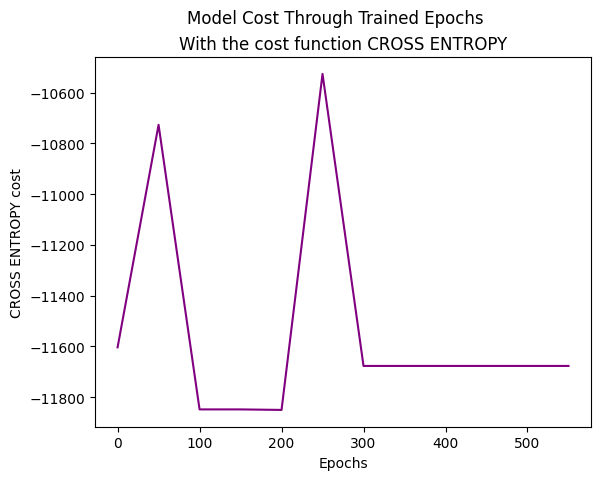

In [19]:
# Grafica los costos a través de las épocas:
IA.view_learning(each_epochs=50)

# [04] 🏆 Mejor Implementación
### Red sugerida para obtener la mejor clasificación

## 💡 Clasificador MNIST

In [20]:
NNClasifier = NeuralNetwork(inputs=64, hidden_layers=[(50, "sigmoid"), (40, "tanh")], output_function="softmax", classes=10, cost_function="cross entropy")
NNClasifier.train(X_train, y_train, epochs=1000, optimizer="adagrad", learning_rate=0.0001, batch_size=10)

Total Epochs 1000


Training Progress: 100%|██████████| 1000/1000 [00:22<00:00, 44.78it/s]



Trained! 😎


Accuracy: 90.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.91      0.80      0.85        61
           2       0.82      1.00      0.90        49
           3       0.88      0.85      0.87        54
           4       0.91      0.89      0.90        56
           5       0.98      0.88      0.93        65
           6       0.96      1.00      0.98        46
           7       0.94      0.96      0.95        52
           8       0.90      0.82      0.86        55
           9       0.83      0.94      0.88        51

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540



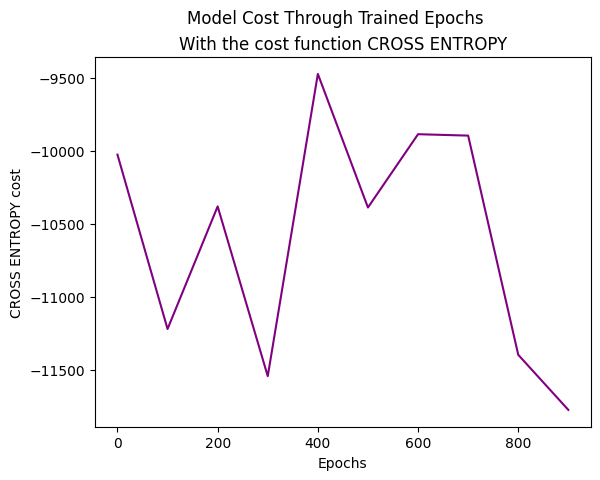

In [21]:
accuracy = NNClasifier.accuracy(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
NNClasifier.metrics(X_test, y_test)
NNClasifier.view_learning(each_epochs=100)

## 📌 Visualización

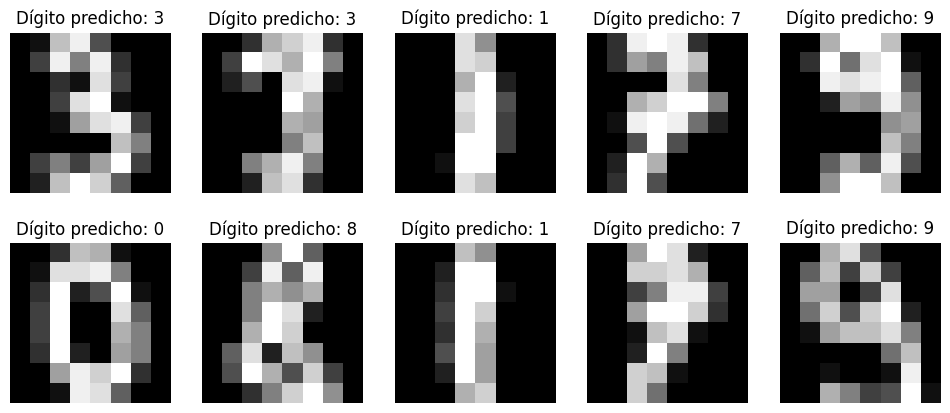

In [22]:
# Toma al azar 10 imágenes de MNIST del X_train:
random_indices = random.sample(range(len(X_train)), 10)
random_images = [X_train[i] for i in random_indices]
random_labels = [y_train[i] for i in random_indices]

# Crea la predicción para cada ejemplo:
predictions = [NNClasifier.predict(image) for image in random_images]

# Grafica las imágenes y su predicción:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i].reshape(8, 8), cmap="gray")
    plt.title(f"Dígito predicho: {predictions[i]}")
    plt.axis("off")
plt.show()

# [05] 💜 @arhcoder
## Realizado por:
### Iván Alejadro Ramos Herrera
### [@arhcoder](https://github.com/arhcoder)